In [34]:
# Basic packages
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tensorflow
import tensorflow as tf

# Preprocessing

**<font color='blue'>1. Load the dataset and show its content.**

In [43]:
df = pd.read_csv('exam_data.csv')
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [15]:
print (df.shape)

(48842, 15)


**<font color='blue'>2.Process the missing values.**

In [11]:
df.replace('?', np.nan, inplace=True)
print(df.isnull().sum())

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


In [21]:
mode_workclass = df['workclass'].mode()[0]
mode_occupation = df['occupation'].mode()[0]
mode_native_country = df['native-country'].mode()[0]

df = df.fillna({
    'workclass': mode_workclass,
    'occupation': mode_occupation,
    'native-country': mode_native_country
})


In [22]:
print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


In [42]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,227026,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


**<font color='blue'>3.One-Hot encoding and data cleaning.**

In [60]:
categorical_columns = df.select_dtypes(include=['object']).columns  

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded.head()  

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,25,226802,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
1,38,89814,9,0,0,50,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,44,160323,10,7688,0,40,False,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,18,103497,10,0,0,30,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [61]:
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df_encoded.columns = [col.replace('&', '_').replace('-', '_').replace(' ', '_') for col in df_encoded.columns]

df_encoded = df_encoded.astype(int)

df_encoded.head()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,workclass_Federal_gov,workclass_Local_gov,workclass_Never_worked,workclass_Private,...,native_country_Puerto_Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad_Tobago,native_country_United_States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,28,336951,12,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
4,18,103497,10,0,0,30,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**<font color='blue'>4.Separate the features and the lable & Standardize the features**

In [62]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('income_>50K', axis=1)  
y = df_encoded['income_>50K']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)


print("Training set shape:", X_train_scaled.shape)
print("Validation set shape:", X_valid_scaled.shape)
print("Test set shape:", X_test_scaled.shape)


Training set shape: (39073, 100)
Validation set shape: (4884, 100)
Test set shape: (4885, 100)


# Training

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))  # input layer + 1st hidden layer
model.add(Dense(64, activation='relu'))  # 2nd hidden layer
model.add(Dense(1, activation='sigmoid'))  # output layer

# use binary_crossentropy as the loss function
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


/Users/zhuanyang/anaconda3/envs/ML/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,249 (83.00 KB)

 Trainable params: 21,249 (83.00 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# Model Training
history = model.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=16,
    validation_data=(X_valid_scaled, y_valid),
    verbose=1
)


Epoch 1/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 281us/step - accuracy: 0.8327 - loss: 0.3663 - val_accuracy: 0.8546 - val_loss: 0.3195
Epoch 2/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 274us/step - accuracy: 0.8527 - loss: 0.3130 - val_accuracy: 0.8585 - val_loss: 0.3128
Epoch 3/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 266us/step - accuracy: 0.8581 - loss: 0.3057 - val_accuracy: 0.8591 - val_loss: 0.3080
Epoch 4/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 263us/step - accuracy: 0.8601 - loss: 0.3053 - val_accuracy: 0.8602 - val_loss: 0.3136
Epoch 5/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 281us/step - accuracy: 0.8604 - loss: 0.2987 - val_accuracy: 0.8614 - val_loss: 0.3063
Epoch 6/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - accuracy: 0.8624 - loss: 0.2959 - val_accuracy: 0.8593 - val_loss: 0.3064
Epoch 7/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 289us/step - accuracy: 0.8631 - loss: 0.2933 - val_accuracy: 0.8593 - val_loss: 0.3091
Epoch 8/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - accuracy: 0.8640 -

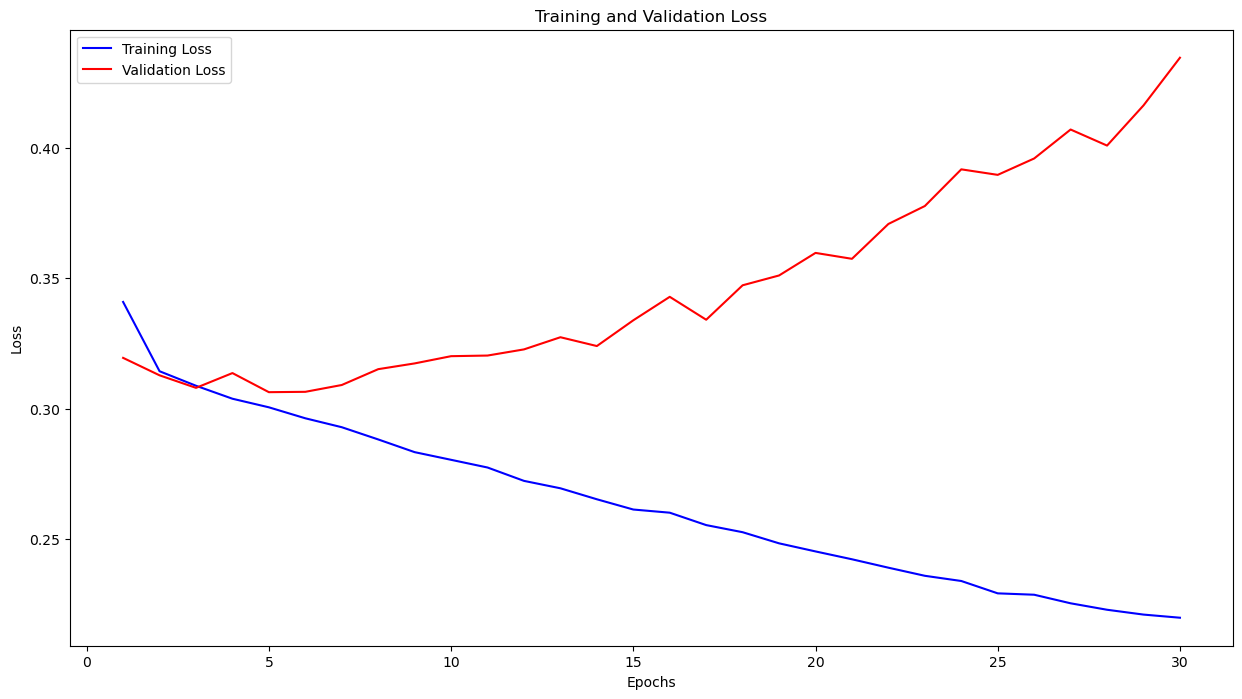

In [66]:
import matplotlib.pyplot as plt


loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(15,8))
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [67]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 241us/step - accuracy: 0.8399 - loss: 0.4459
Test Loss: 0.44096747040748596
Test Accuracy: 0.8436028361320496


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,249 (83.00 KB)

 Trainable params: 21,249 (83.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 305us/step - accuracy: 0.8055 - loss: 0.5491 - val_accuracy: 0.8489 - val_loss: 0.3872
Epoch 2/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 287us/step - accuracy: 0.8430 - loss: 0.3973 - val_accuracy: 0.8518 - val_loss: 0.3572
Epoch 3/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 287us/step - accuracy: 0.8455 - loss: 0.3674 - val_accuracy: 0.8540 - val_loss: 0.3463
Epoch 4/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 293us/step - accuracy: 0.8473 - loss: 0.3621 - val_accuracy: 0.8528 - val_loss: 0.3498
Epoch 5/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - accuracy: 0.8447 - loss: 0.3637 - val_accuracy: 0.8561 - val_loss: 0.3454
Epoch 6/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - accuracy: 0.8462 - loss: 0.3653 - val_accuracy: 0.8557 - val_loss: 0.3487
Epoch 7/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - accuracy: 0.8479 - loss: 0.3586 - val_accuracy: 0.8522 - val_loss: 0.3463
Epoch 8/30
2443/2443 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - accuracy: 0.8475 -

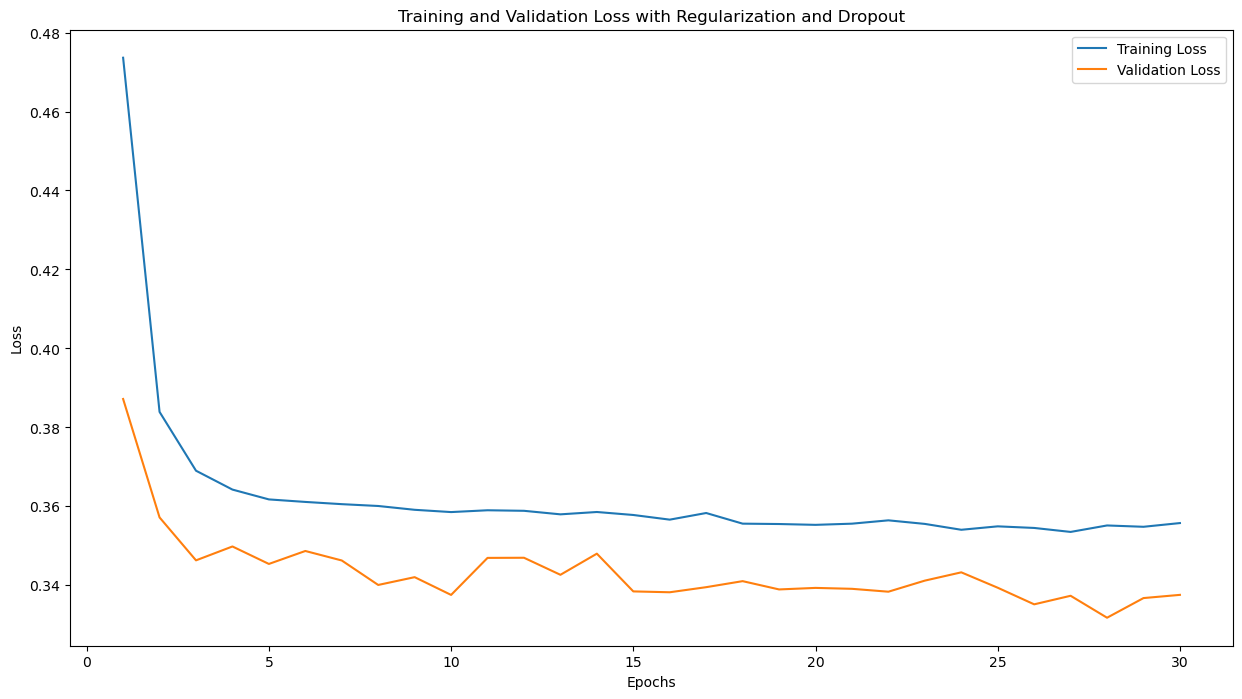

In [69]:
# as the validation loss is increasing last time, which I am not satisfied, so modify the model and train it again

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2


model = Sequential()

# add input layer
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
# add Dropout layer
model.add(Dropout(0.5))


model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))

# add output layer
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.summary()

# traing the model again
history = model.fit(
    X_train_scaled, y_train,
    epochs=30,
    batch_size=16,
    validation_data=(X_valid_scaled, y_valid),
    verbose=1
)


plt.figure(figsize=(15,8))
plt.plot(np.arange(1, 31), history.history['loss'], label='Training Loss')
plt.plot(np.arange(1, 31), history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Regularization and Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.8543 - loss: 0.3303
Test Loss: 0.3307504951953888
Test Accuracy: 0.8577277660369873


**<font color='blue'>Comparing to the last time, this time the validation loss is decreasing, so the model is better, and the accuracy is around 85%, which is pretty convincing. And I tried for the 3rd model improvement, but the result is worse, so I deleted it, only keep the 1st and the 2nd one, where we can see the improvement here.
I really wanna the accuracy can be more than 90%, I think the problem here is that I should analyze the features at the beginning and drop some columns seem useless like 'fnlwgt'**